Import necessary libraries

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from PIL import Image

Load pre-trained AlexNet model, and set the model to evaluation mode

In [ ]:
# Load the pre-trained AlexNet model
model = models.alexnet(pretrained=True)

# Set the model to evaluation mode
model.eval()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Define the image preprocessing steps

In [ ]:
# Define the image preprocessing steps
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

Show the sample image

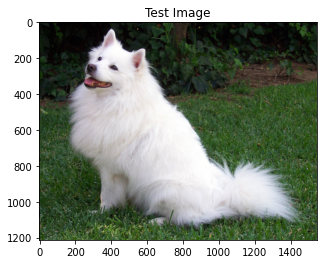

In [ ]:
# Load the test image and preprocess it
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "test.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

img = Image.open("test.jpg")
img_tensor = preprocess(img)
img_tensor = img_tensor.unsqueeze(0)

# Plot the test image
plt.imshow(img)
plt.title("Test Image")
plt.axis("on")
plt.show()


Let's test whether the AlexNet works!

In [ ]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

# Pass the image through the model
output = model(img_tensor)
print("output variable:", output.detach().numpy().shape)
# Get the predicted class index and class probabilities
probs, index = torch.topk(torch.softmax(output, dim=1), k=5)
index = index[0].detach().numpy().tolist()
probs = probs[0].detach().numpy().tolist()

# Load the ImageNet class names
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

# Map the predicted class index to the corresponding class name
pred_classes = [categories[i] for i in index]

# Print the top 5 predicted categories
print("Top 5 predicted categories:")
for i in range(5):
    print(f"{i+1}. {pred_classes[i]} ({probs[i] * 100:.2f}%)")

--2023-02-16 06:42:13--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2023-02-16 06:42:13 (63.8 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]

output variable: (1, 1000)
Top 5 predicted categories:
1. Samoyed (72.45%)
2. wallaby (13.94%)
3. Pomeranian (5.87%)
4. Angora (2.28%)
5. Arctic fox (1.25%)


Visualize Weights in the first conv layer

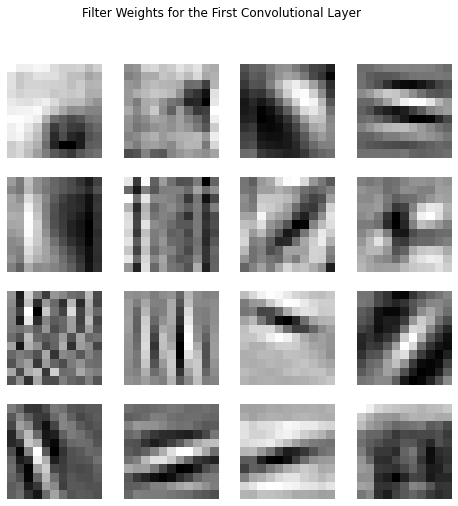

In [ ]:
# Get the filter weights for the first convolutional layer
conv1_weights = model.features[0].weight.detach().numpy()
conv2_weights = model.features[3].weight.detach().numpy()

# Plot the filter weights for the first convolutional layer
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(conv1_weights[i][0], cmap="gray")
    #plt.imshow(conv2_weights[i][0], cmap="gray")
    plt.axis("off")
plt.suptitle("Filter Weights for the First Convolutional Layer")
#plt.suptitle("Filter Weights for the Second Convolutional Layer")
plt.show()

Visualize Activation in the first layer

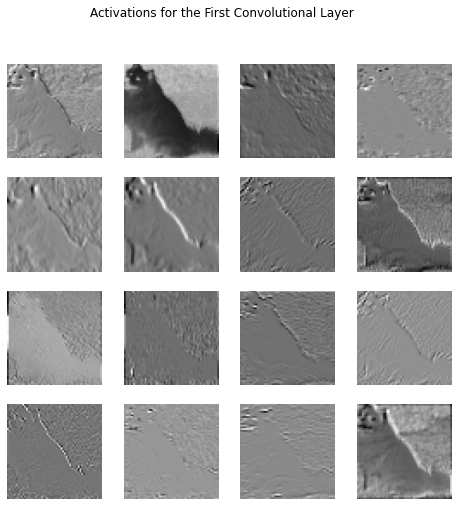

In [ ]:
# Pass the image through the model
output = model(img_tensor)

# Get the activations for the first convolutional layer
activations = model.features[0](img_tensor)
activations = activations[0].detach().numpy()

# Plot the activations for the first convolutional layer
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(activations[i], cmap="gray")
    plt.axis("off")
plt.suptitle("Activations for the First Convolutional Layer")
plt.show()

Measure each layer activation, and measure the single unit response

Activation dimension: 13
Shape of layer activation: (1, 64, 55, 55)
Layer activation dimension: (55, 55)


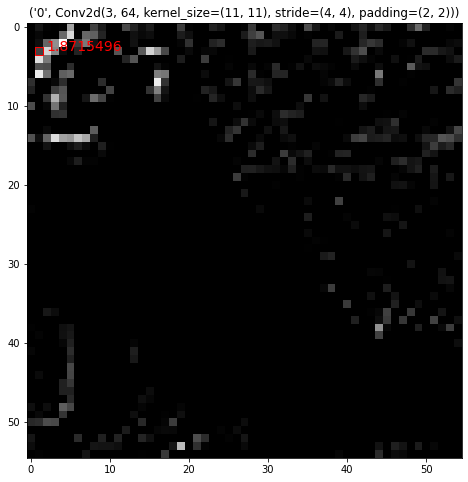

Shape of layer activation: (1, 64, 55, 55)
Layer activation dimension: (55, 55)


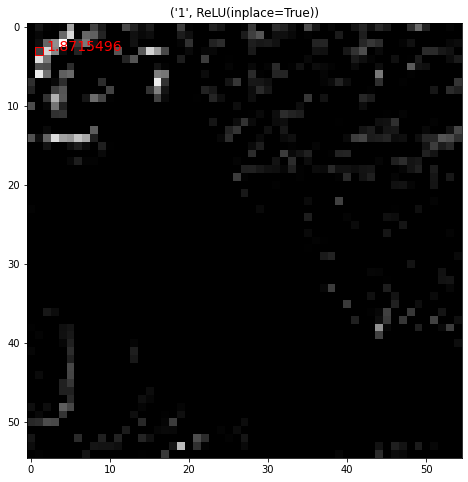

Shape of layer activation: (1, 64, 27, 27)
Layer activation dimension: (27, 27)


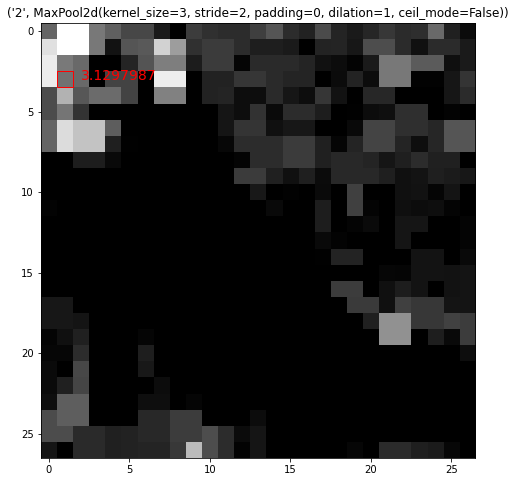

Shape of layer activation: (1, 192, 27, 27)
Layer activation dimension: (27, 27)


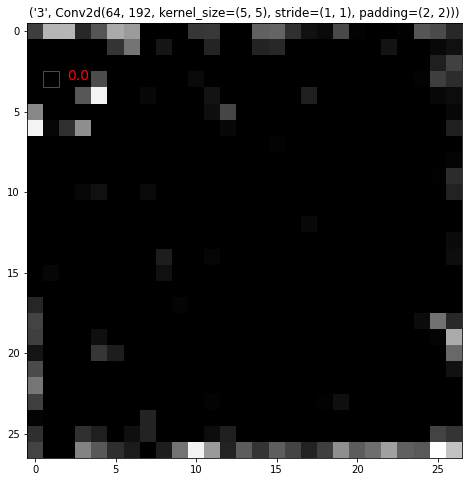

Shape of layer activation: (1, 192, 27, 27)
Layer activation dimension: (27, 27)


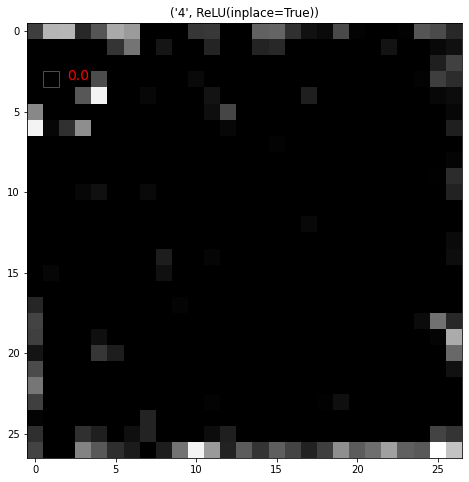

Shape of layer activation: (1, 192, 13, 13)
Layer activation dimension: (13, 13)


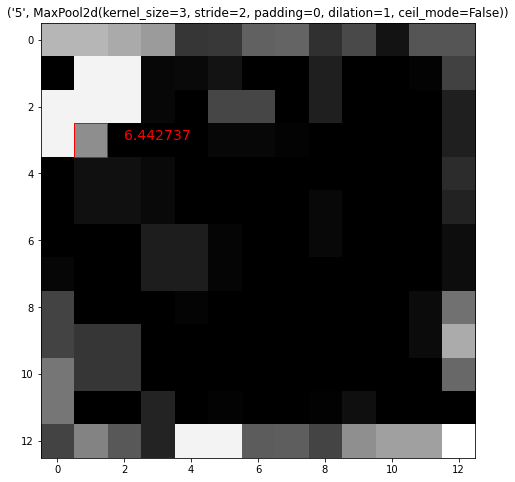

Shape of layer activation: (1, 384, 13, 13)
Layer activation dimension: (13, 13)


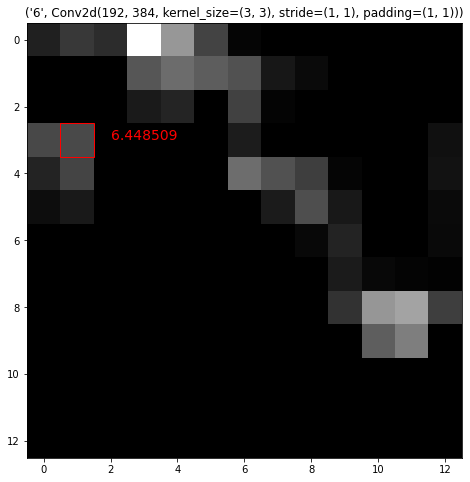

Shape of layer activation: (1, 384, 13, 13)
Layer activation dimension: (13, 13)


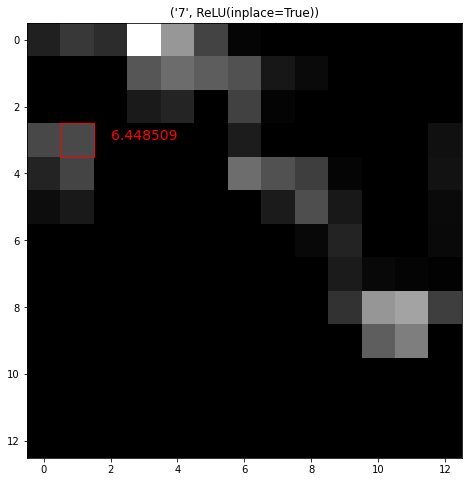

Shape of layer activation: (1, 256, 13, 13)
Layer activation dimension: (13, 13)


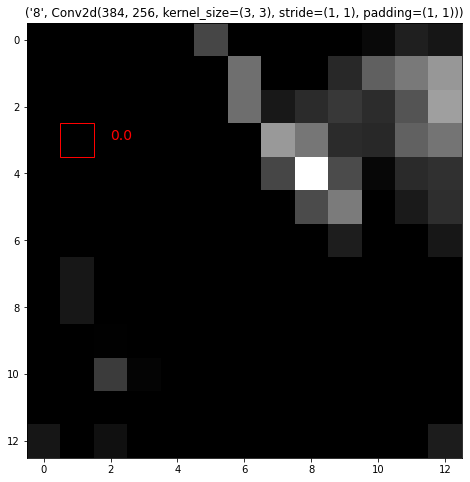

Shape of layer activation: (1, 256, 13, 13)
Layer activation dimension: (13, 13)


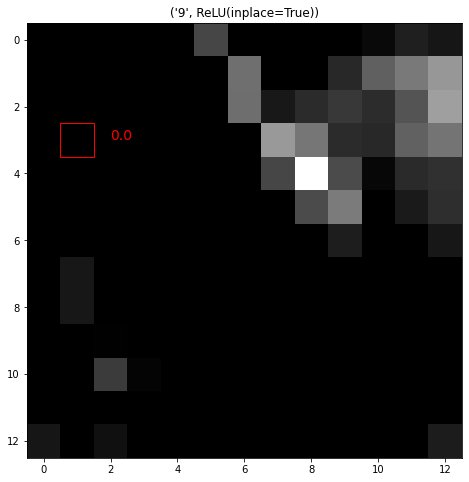

Shape of layer activation: (1, 256, 13, 13)
Layer activation dimension: (13, 13)


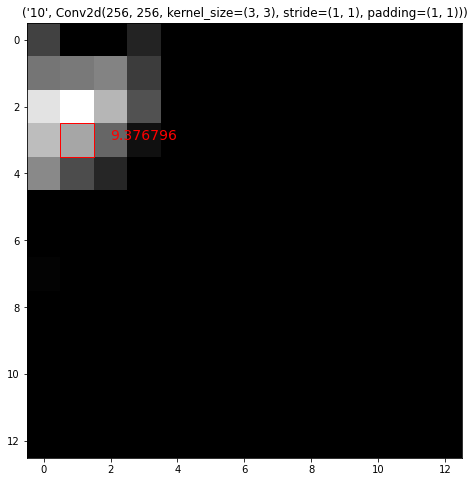

Shape of layer activation: (1, 256, 13, 13)
Layer activation dimension: (13, 13)


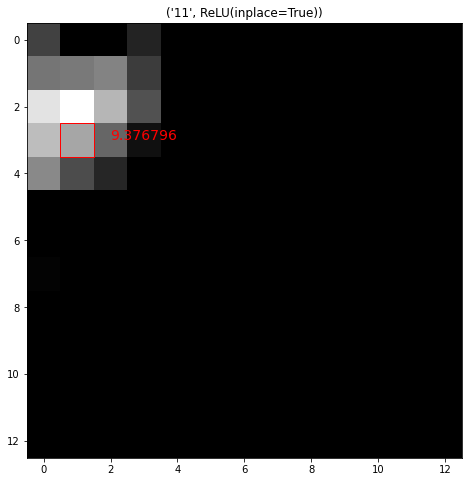

Shape of layer activation: (1, 256, 6, 6)
Layer activation dimension: (6, 6)


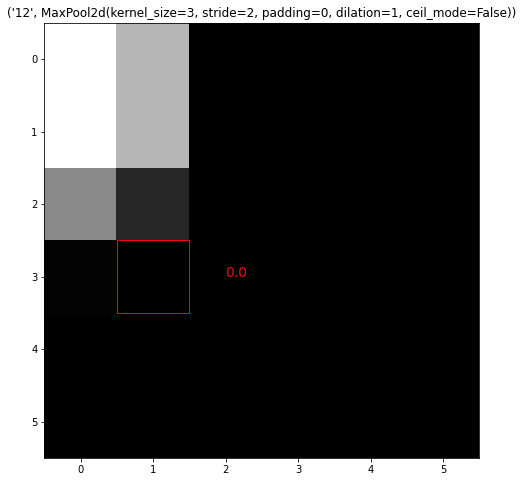

In [ ]:
# Pass the image through each layer in the model
activations = []
test_tensor = img_tensor
for name, module in model.features._modules.items(): #Feature extraction layers
    #print(name)
    #print(module) 
    test_tensor = module(test_tensor)
    activations.append(test_tensor)
temp_module = list(model.features._modules.items())

print("Activation dimension:", len(activations))
# Plot the activations for a specific channel of each Conv layer in the model
for i, layer_activations in enumerate(activations):
    print("Shape of layer activation:", layer_activations.detach().numpy().shape)
    plt.figure(figsize=(8, 8))
    plt.imshow(layer_activations[0, 0].detach().numpy(), cmap="gray")
    print("Layer activation dimension:", layer_activations[0, i].detach().numpy().shape)
    x, y = 1, 3
    plt.gca().add_patch(plt.Rectangle((x-0.5, y-0.5), 1, 1, fill=None, color='red'))
    plt.text(x+1, y, str(layer_activations[0, 0, y, x].detach().numpy()), color='red', fontsize=14)
    plt.title(temp_module[i])
    plt.axis("on")
    plt.show()

Similar for the classifier

Layer activation dimension: (1, 9216)


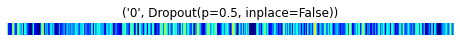

Layer activation dimension: (1, 4096)


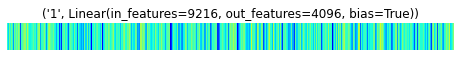

Layer activation dimension: (1, 4096)


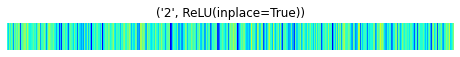

Layer activation dimension: (1, 4096)


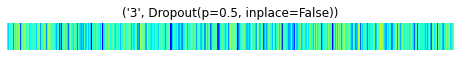

Layer activation dimension: (1, 4096)


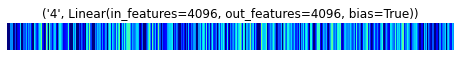

Layer activation dimension: (1, 4096)


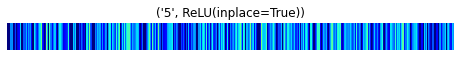

Layer activation dimension: (1, 1000)


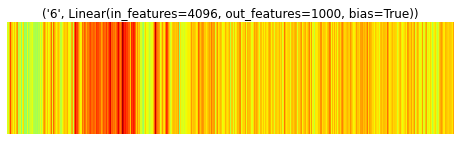

In [ ]:
test_tensor = img_tensor
for name, module in model.features._modules.items():
    test_tensor = module(test_tensor)

# Pass the output of feature extraction layers through avgpool layer
test_tensor = model.avgpool(test_tensor)

# Reshape the output of avgpool layer
test_tensor = test_tensor.view(test_tensor.size(0), -1)

# Pass the reshaped tensor through classifier layers
classifier_activations = []
for name, module in model.classifier._modules.items(): #Classifier layers
    #print(name)
    #print(module)
    test_tensor = module(test_tensor)
    classifier_activations.append(test_tensor)

temp_module = list(model.classifier._modules.items())

for i, layer_activations in enumerate(classifier_activations):
    print("Layer activation dimension:", layer_activations.detach().numpy().shape)
    plt.figure(figsize=(8, 8))
    plt.imshow(layer_activations.detach().numpy(), cmap="jet", norm=mcolors.PowerNorm(0.3), aspect = 250)
    plt.title(temp_module[i])
    plt.axis("off")
    plt.show()

How classification is made? Classification in the last readout layer

(1, 1000)
(5,)


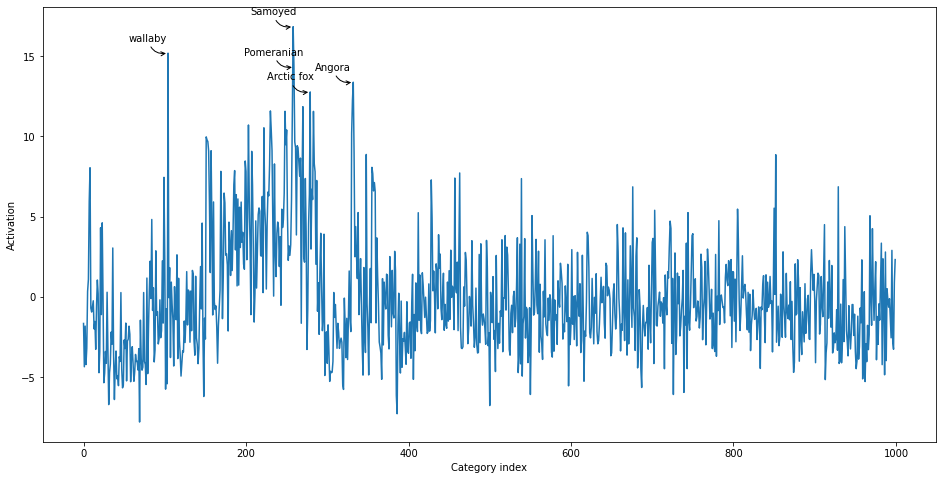

In [ ]:
# find the 5 highest activations and their corresponding category indices
print(classifier_activations[6].detach().numpy().shape)
classifier_activations_flat = classifier_activations[6].detach().numpy().flatten()
top_5_indices = np.argsort(classifier_activations_flat)[-5:]
print(top_5_indices.shape)
top_5_categories = [categories[i] for i in top_5_indices]
top_5_activations = [classifier_activations_flat[i] for i in top_5_indices]

# plot the line graph
plt.figure(figsize=(16, 8))
plt.plot(classifier_activations_flat)
plt.xlabel("Category index")
plt.ylabel("Activation")

# annotate the 5 highest activations
for i, (index, category, activation) in enumerate(zip(top_5_indices, top_5_categories, top_5_activations)):
    plt.annotate(category, (index, activation), xytext=(-20, 10), textcoords='offset points', ha='center', va='bottom',
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))

plt.show()

Now, Let's try to visualize representation using a real datasets.

  0%|          | 0/2640397119 [00:00<?, ?it/s]

Extracting ./data/stl10_binary.tar.gz to ./data


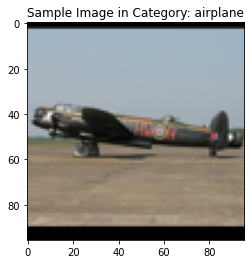

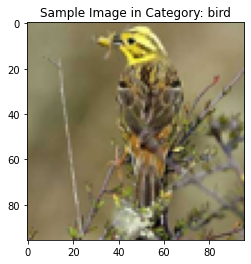

In [ ]:
import torch
import torchvision

# Load the STL-10 dataset
dataset = torchvision.datasets.STL10(root="./data", split='train', transform=None, target_transform=None, download=True)
# Get the label names
classes = ['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']

# Prepare 100 images in two categories
category1 = 0
category2 = 1
category1_idx = [idx for idx in range(len(dataset)) if dataset[idx][1] == category1]
category2_idx = [idx for idx in range(len(dataset)) if dataset[idx][1] == category2]
category1_images = [dataset[idx][0] for idx in category1_idx[:100]]
category2_images = [dataset[idx][0] for idx in category2_idx[:100]]

# Visualize a sample image in each category
plt.imshow(category1_images[0], cmap='gray')
plt.title("Sample Image in Category: " + classes[category1])
plt.show()

plt.imshow(category2_images[0], cmap='gray')
plt.title("Sample Image in Category: " + classes[category2])
plt.show()

# Preprocess the images
cat1_input_tensor = [preprocess(Image.fromarray(np.array(img))) for img in category1_images]
cat2_input_tensor = [preprocess(Image.fromarray(np.array(img))) for img in category2_images]

Calculate layer-wise activation of 100 images in each category

(1, 256, 6, 6)


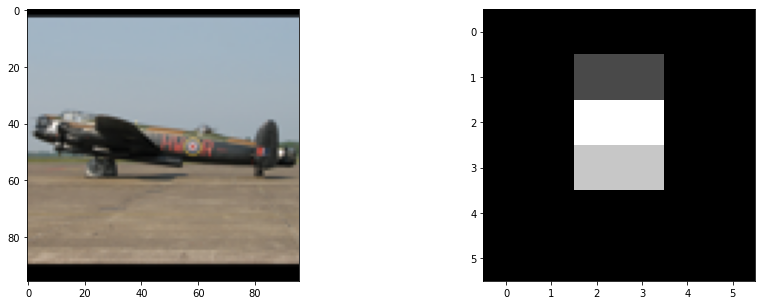

(1, 256, 6, 6)


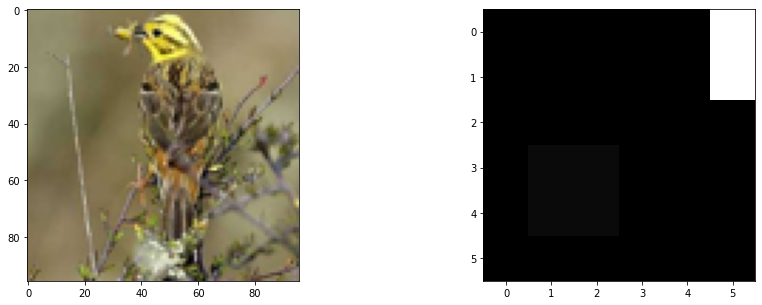

In [ ]:
category1_activations = []
# Pass each image through the network
for image in cat1_input_tensor:
    test_tensor = image.unsqueeze(0)
    layer_activations = []
    for name, module in model.features._modules.items(): #Feature extraction layers
        test_tensor = module(test_tensor)
        layer_activations.append(test_tensor)
    category1_activations.append(layer_activations)

n = 0 # nth image
m = 12 # mth layer
k = 0 # kth channel

# Extract activations for nth image and mth layer
temp_activations1 = category1_activations[n][m].detach().numpy()
print(temp_activations1.shape)

# Plot original image and activations side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(category1_images[n], cmap='gray')
axs[1].imshow(temp_activations1[0, k], cmap='gray')
plt.show()

category2_activations = []
# Pass each image through the network
for image in cat2_input_tensor:
    test_tensor = image.unsqueeze(0)
    layer_activations = []
    for name, module in model.features._modules.items(): #Feature extraction layers
        test_tensor = module(test_tensor)
        layer_activations.append(test_tensor)
    category2_activations.append(layer_activations)

n = 0 # nth image
m = 12 # mth layer
k = 0 # kth channel

# Extract activations for nth image and mth layer
temp_activations2 = category2_activations[n][m].detach().numpy()
print(temp_activations2.shape)

# Plot original image and activations side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(category2_images[n], cmap='gray')
axs[1].imshow(temp_activations2[0, k], cmap='gray')
plt.show()

Visualize activation using PCA & tSNE

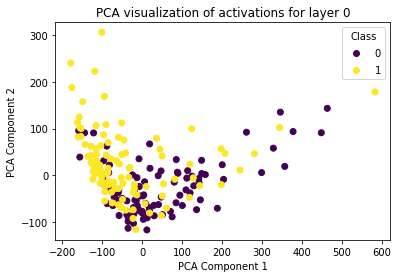

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


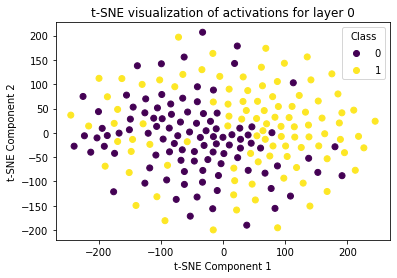

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

temp_module = list(model.features._modules.items())
# Visualize activations using PCA
def visualize_pca(activations, labels, layer_name):
    pca = PCA(n_components=2)
    reduced_activations = pca.fit_transform(activations)
    
    fig, ax = plt.subplots()
    scatter = ax.scatter(reduced_activations[:, 0], reduced_activations[:, 1], c=labels)
    ax.set_title(f'PCA visualization of activations for layer {layer_name}')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.legend(*scatter.legend_elements(), title="Class")
    plt.show()
    
# Visualize activations using t-SNE
def visualize_tsne(activations, labels, layer_name):
    tsne = TSNE(n_components=2)
    reduced_activations = tsne.fit_transform(activations)
    
    fig, ax = plt.subplots()
    scatter = ax.scatter(reduced_activations[:, 0], reduced_activations[:, 1], c=labels)
    ax.set_title(f't-SNE visualization of activations for layer {layer_name}')
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')
    ax.legend(*scatter.legend_elements(), title="Class")
    plt.show()

x = 0 # the layer number you want to visualize

# Extract activations from layer x for each category
category1_activations_x = [tensor[x].flatten().detach().numpy() for tensor in category1_activations]
category2_activations_x = [tensor[x].flatten().detach().numpy() for tensor in category2_activations]

# Concatenate activations from category 1 and 2
all_activations = np.concatenate([category1_activations_x, category2_activations_x], axis=0)
all_activations = all_activations.reshape(all_activations.shape[0], -1)

# Labels for category 1 and 2
labels = [0] * len(category1_activations_x) + [1] * len(category2_activations_x)

visualize_pca(all_activations, labels, temp_module[x][0])
visualize_tsne(all_activations, labels, temp_module[x][0])

Calculate the mahalanobis distance (i.e., dissimilarity) between the two representation

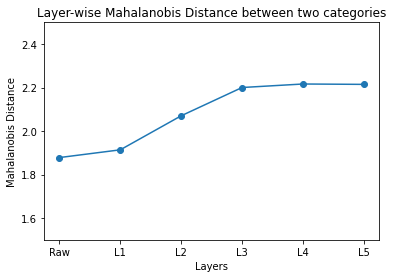

In [ ]:
from scipy.spatial.distance import mahalanobis

temp_module = list(model.features._modules.items())

# Calculate Mahalanobis distance
def mahalanobis_distance(activations1, activations2, layer_name):
    activations = np.concatenate([activations1, activations2], axis=0)
    activations = activations.reshape(activations.shape[0], -1)
    pca = PCA(n_components=2)
    reduced_activations = pca.fit_transform(activations)
    
    activations1_reduced = reduced_activations[:len(activations1), :]
    activations2_reduced = reduced_activations[len(activations1):, :]
    
    # calculate covariance matrix
    cov = np.cov(reduced_activations.T)
    inv_cov = np.linalg.inv(cov)
    
    distances = []
    for i in range(len(activations1_reduced)):
        distances.append(mahalanobis(activations1_reduced[i], activations2_reduced[i], inv_cov))
    
    return np.mean(distances)

# Calculate average Mahalanobis distance from raw pixel values
raw_pixel_values1 = [np.array(image).flatten() for image in category1_images]
raw_pixel_values2 = [np.array(image).flatten() for image in category2_images]
avg_mahalanobis_distance_raw = mahalanobis_distance(raw_pixel_values1, raw_pixel_values2, temp_module)

# Calculate average Mahalanobis distance for each layer
layer_indices = [2, 5, 7, 9, 11]
layer_names = [temp_module[i][0] for i in layer_indices]
avg_mahalanobis_distances = []
for i in layer_indices:
    category1_activations_i = [tensor[i].flatten().detach().numpy() for tensor in category1_activations]
    category2_activations_i = [tensor[i].flatten().detach().numpy() for tensor in category2_activations]    
    
    avg_mahalanobis_distance = mahalanobis_distance(category1_activations_i, category2_activations_i, temp_module)
    avg_mahalanobis_distances.append(avg_mahalanobis_distance)

# Plot average Mahalanobis distances across the layers
x = ["Raw"] + ["L1"] + ["L2"] + ["L3"] + ["L4"] + ["L5"]
y = [avg_mahalanobis_distance_raw] + avg_mahalanobis_distances

plt.plot(x, y, marker='o')
plt.ylim(0, max(y) + 0.5)
plt.xlabel("Layers")
plt.ylabel("Mahalanobis Distance")
plt.title("Layer-wise Mahalanobis Distance between two categories")
plt.ylim(1.5, 2.5)
plt.show()
